In [24]:
# Here we import the packages we will need
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import re
import itertools

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_validate, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.preprocessing import label_binarize


In [25]:
#import scripts
sys.path.append(os.path.abspath("/Users/lawhea1214/Documents/WGU/603/data"))
sys.path.append(os.path.abspath("/Users/lawhea1214/Documents/WGU/603/src"))



In [ ]:
# class SaveIt:
#     date_it = date.today()
#     def __init__(self, path, dataframe, filename='medical', type='csv',version="v1"):
#         self.path = path
#         self.filename = filename
#         self.type = type
#         self.version = version
#         self.dataframe = dataframe
#         self.create_name = f"{self.filename}_{SaveIt.date_it}_{self.version}.{self.type}"
#         self.join_path = os.path.join(self.path, self.create_name)

#     def save_data(self):
#         self.dataframe.to_csv(self.join_path, index=False)
    
#     def load_data(self):
#         return pd.read_csv(self.join_path)

In [28]:
df = pd.read_csv('data/medical_clean.csv')

In [29]:
print(df.isnull().any().any())
print(df.duplicated().any().any())

False
False


In [30]:
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [31]:
regex = r'_[a-zA-z]'
word = "Complication_risk"
match = re.search(regex, word)
letter = match.group()[1].upper()
start = match.start()
end = match.end()
new_word = word[:start] + letter + word[end:]
print(new_word)

ComplicationRisk


In [32]:
for word in df.columns:
    match = re.search(regex, word)
    if match: 
        letter = match.group()[1].upper()
        start = match.start()
        end = match.end()
        formula = word[:start] + letter + word[end:]
        df.rename(columns={word : formula}, inplace = True)
print(df.columns)

Index(['CaseOrder', 'CustomerId', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitDLevels', 'DocVisits', 'FullMeals_eaten', 'vitDSupp', 'SoftDrink',
       'InitialAdmin', 'HighBlood', 'Stroke', 'ComplicationRisk', 'Overweight',
       'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety',
       'AllergicRhinitis', 'RefluxEsophagitis', 'Asthma', 'Services',
       'InitialDays', 'TotalCharge', 'AdditionalCharges', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')


In [33]:
df.rename(columns={"Item1": "TimelyAdmission", "Item2":"TimelyTreatment", "Item3":"TimelyVisits", "Item4":"Reliability", "Item5":"Options", "Item6":"HoursOfTreatment", "Item7":"CouretousStaff", "Item8":"ActiveListening", "FullMeals_eaten":"FullMealsEaten"}, inplace=True)


In [ ]:
# path = '/Users/lawhea1214/Documents/WGU/D603/task1/data'
# filename = 'medical_clean'
# test = SaveIt(path, df, filename)

In [35]:
print(test.save_data())

None


In [82]:
df2 = pd.read_csv('data/medical_clean_2025-09-29_v1.csv')

In [37]:
df2.head()

,CaseOrder,CustomerId,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,AdditionalCharges,TimelyAdmission,TimelyTreatment,TimelyVisits,Reliability,Options,HoursOfTreatment,CouretousStaff,ActiveListening
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaseOrder          10000 non-null  int64  
 1   CustomerId         10000 non-null  object 
 2   Interaction        10000 non-null  object 
 3   UID                10000 non-null  object 
 4   City               10000 non-null  object 
 5   State              10000 non-null  object 
 6   County             10000 non-null  object 
 7   Zip                10000 non-null  int64  
 8   Lat                10000 non-null  float64
 9   Lng                10000 non-null  float64
 10  Population         10000 non-null  int64  
 11  Area               10000 non-null  object 
 12  TimeZone           10000 non-null  object 
 13  Job                10000 non-null  object 
 14  Children           10000 non-null  int64  
 15  Age                10000 non-null  int64  
 16  Income             1000

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

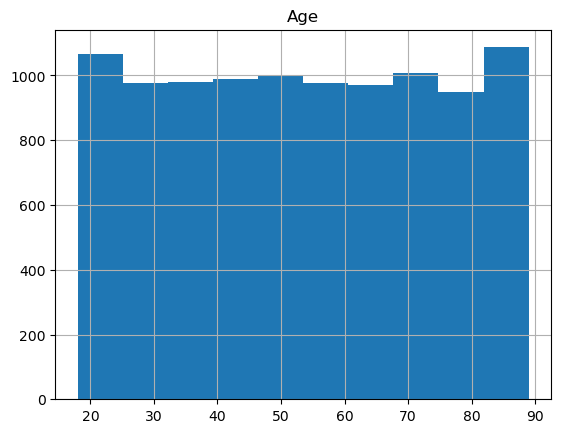

In [39]:
df2.hist("Age")

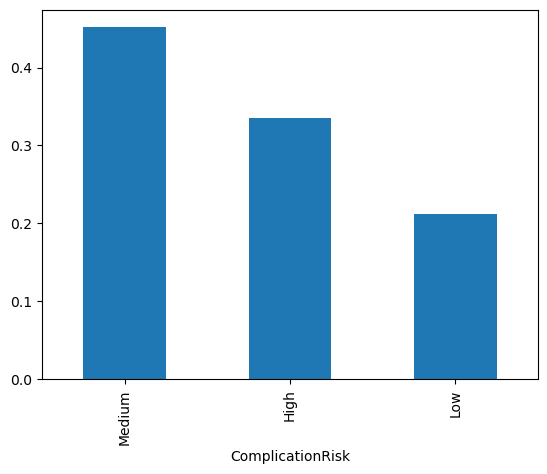

In [40]:

df2["ComplicationRisk"].value_counts(normalize=True).plot(kind="bar") #obtains proportions using normalize.
plt.show()

In [41]:
df2.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitDLevels,DocVisits,...,TotalCharge,AdditionalCharges,TimelyAdmission,TimelyTreatment,TimelyVisits,Reliability,Options,HoursOfTreatment,CouretousStaff,ActiveListening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [42]:
X = df2[["Overweight", "HighBlood", "Stroke", "Arthritis", "Hyperlipidemia", "BackPain", "Anxiety", "AllergicRhinitis", "RefluxEsophagitis", "Asthma"]]
y = df2[["ComplicationRisk"]]

In [43]:
X.head()

,Overweight,HighBlood,Stroke,Arthritis,Hyperlipidemia,BackPain,Anxiety,AllergicRhinitis,RefluxEsophagitis,Asthma
0,No,Yes,No,Yes,No,Yes,Yes,Yes,No,Yes
1,Yes,Yes,No,No,No,No,No,No,Yes,No
2,Yes,Yes,No,No,No,No,No,No,No,No
3,No,No,Yes,Yes,No,No,No,No,Yes,Yes
4,No,No,No,No,Yes,No,No,Yes,No,No


In [45]:
X.to_csv('/Users/lawhea1214/Documents/WGU/D603/task1/data/X_mc_2025-09-29_v1.csv')
y.to_csv('/Users/lawhea1214/Documents/WGU/D603/task1/data/y_mc_2025-09-29_v1.csv')

In [46]:
sort_y = y["ComplicationRisk"].unique()
print(sort_y)

['Medium' 'High' 'Low']


In [49]:
#encode data function   
def encode_it(dc):
    dfe = dc.copy()
    for col in dfe.columns:
        if dfe[col].dtype == 'object':
            col_lst = ['No', 'Yes']

            #create and fit encoder
            encoder = OrdinalEncoder(categories=[col_lst])
            
            dfe[col] = encoder.fit_transform(dfe[[col]])
    test = SaveIt(path, dfe, "X_encoded")
    test.save_data()
    return dfe

def label_encoder(dc):
    dfl = dc.copy()
    for col in dfl.columns:
        if dfl[col].dtype == 'object':
            col_lst = ['Low', 'Medium', 'High']

            #create and fit encoder
            label = LabelEncoder()
            
            dfl[col] = label.fit_transform(dfl[[col]])
    test = SaveIt(path, dfl, "y_encoded")
    test.save_data()
    return dfl
        

In [ ]:
# encode_it(X)
# label_encoder(y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,ComplicationRisk
0,2
1,0
2,2
3,2
4,1
...,...
9995,2
9996,2
9997,0
9998,2


In [53]:
X_e = pd.read_csv('/Users/lawhea1214/Documents/WGU/D603/task1/data/X_encoded_2025-09-29_v1.csv')

In [54]:
y_e = pd.read_csv('/Users/lawhea1214/Documents/WGU/D603/task1/data/y_encoded_2025-09-29_v1.csv')

In [65]:
# 0 = 'No', 1 = 'Yes'
X_e.head()

,Overweight,HighBlood,Stroke,Arthritis,Hyperlipidemia,BackPain,Anxiety,AllergicRhinitis,RefluxEsophagitis,Asthma
0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [66]:
#0 = 'Low', 1 = 'Medium', 2 = 'High'
y_e.head()

,ComplicationRisk
0,2
1,0
2,2
3,2
4,1


In [67]:
#ran train test split and transformed y values into 1D array before the split
X_train, X_test, y_train, y_test = train_test_split(X_e, y_e.values.ravel(), test_size=0.33, random_state=101,stratify=y_e) 

In [57]:
#Save the train test split
# path = '/Users/lawhea1214/Documents/WGU/603/data'
# filename = 'medical_clean'
# d_y_test = pd.DataFrame(y_test)
# run_save = SaveIt(path,d_y_test,'y_test')
# run_save.save_data()


In [68]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1, class_weight="balanced")
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0)

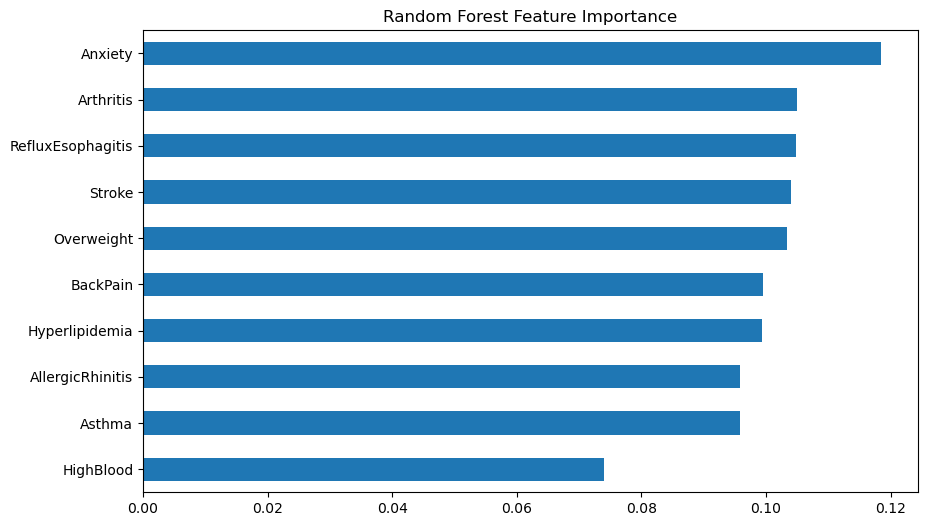

In [69]:
# feature importance
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances.sort_values().plot(kind="barh", figsize=(10,6))
plt.title("Random Forest Feature Importance")
plt.show()


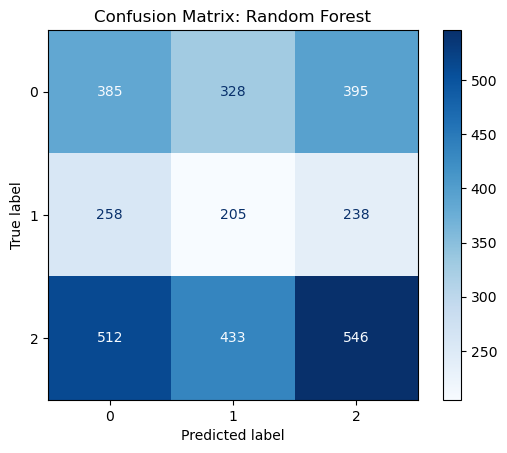

Prediction [0 0 2 ... 2 1 0]
Prediction Probabilities [[0.40712773 0.24521344 0.34765882]
 [0.35691248 0.30941925 0.33366827]
 [0.02639032 0.44301657 0.53059311]
 ...
 [0.31555684 0.33825069 0.34619247]
 [0.32907886 0.37647539 0.29444576]
 [0.37626035 0.32774121 0.29599843]]


In [70]:
#Predict for the test set and the plot for the conusion matrix
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)
#The confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix: Random Forest")
plt.show()

print("Prediction", y_pred)
print("Prediction Probabilities", y_pred_proba)

In [71]:
print("Test accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Classification report:\n", classification_report(y_test, y_pred, digits=3))

Test accuracy: 0.3442
Classification report:
               precision    recall  f1-score   support

           0      0.333     0.347     0.340      1108
           1      0.212     0.292     0.246       701
           2      0.463     0.366     0.409      1491

    accuracy                          0.344      3300
   macro avg      0.336     0.335     0.332      3300
weighted avg      0.366     0.344     0.351      3300



In [72]:
classes = np.unique(y_test)
#ROC-AUC is binary and multiclass ROC is computed one-vs-rest
#label_binarize() compares each class against all other classes using one-vs-rest (ovr)
y_test_bin = label_binarize(y_test, classes=classes) #binarize labels into 0/1 columns per class
y_pred_proba.shape
roc_auc = roc_auc_score(y_test_bin, y_pred_proba, average="macro", multi_class="ovr")
print("AUC-ROC :", round(roc_auc, 4))

AUC-ROC : 0.5028


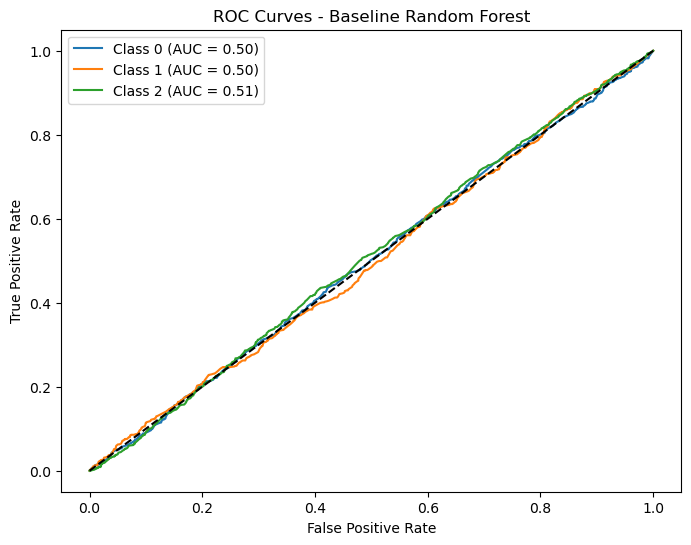

In [73]:
# bin labels for class one 
# y_test_bin[:, 0] --> (one-vs-rest, 1 = sample is class 0, 0 - not class 1)
#y_pred_proba[:,0] --> model's predicted probabilities that each sample belongs to 0
fpr0, tpr0, _ = roc_curve(y_test_bin[:, 0], y_pred_proba[:, 0])
roc_auc0 = auc(fpr0, tpr0)

# ROC for class 1
#y_test_bin[:, 1] --> (one-vs-rest, 1 = sample is class 1, 1 - not class 1)
#y_pred_proba[:,1] --> model's predicted probabilities that each sample belongs to 1
fpr1, tpr1, _ = roc_curve(y_test_bin[:, 1], y_pred_proba[:, 1])
roc_auc1 = auc(fpr1, tpr1)

# ROC for class 2
#y_test_bin[:, 2] --> (one-vs-rest, 2 = sample is class 2, 2 - not class 2)
#y_pred_proba[:,2] --> model's predicted probabilities that each sample belongs to 2
fpr2, tpr2, _ = roc_curve(y_test_bin[:, 2], y_pred_proba[:, 2])
roc_auc2 = auc(fpr2, tpr2)

# Plot all curves
plt.figure(figsize=(8,6))
plt.plot(fpr0, tpr0, label=f"Class 0 (AUC = {roc_auc0:.2f})")
plt.plot(fpr1, tpr1, label=f"Class 1 (AUC = {roc_auc1:.2f})")
plt.plot(fpr2, tpr2, label=f"Class 2 (AUC = {roc_auc2:.2f})")

# Add diagonal line for "random guess"
#if model is no better than random, ROC cuver hugs line isntead of curving up
plt.plot([0, 1], [0, 1], "k--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Baseline Random Forest")
plt.legend()
plt.show()


In [74]:
rf = RandomForestClassifier(random_state=0)

#store results for each cv
all_results = {}
for c in range(2,11):
    cv_results = cross_validate(
        estimator=rf,
        X=X_train,
        y=y_train,
        cv=c,
        scoring="accuracy",
        return_train_score=True
        )
    # store the scores
    all_results[c] = cv_results["test_score"]
    
    #print fold-by-fold and mean
    print(f"\nCV = {c} folds")
    print("Fold scores:", cv_results["test_score"])
    print("Mean test score:", np.mean(cv_results["test_score"]))




CV = 2 folds
Fold scores: [0.38029851 0.3719403 ]
Mean test score: 0.3761194029850746

CV = 3 folds
Fold scores: [0.38451209 0.39184953 0.38513211]
Mean test score: 0.38716457499836626

CV = 4 folds
Fold scores: [0.37970149 0.36835821 0.3880597  0.38268657]
Mean test score: 0.3797014925373134

CV = 5 folds
Fold scores: [0.37761194 0.39253731 0.37761194 0.39552239 0.38507463]
Mean test score: 0.38567164179104474

CV = 6 folds
Fold scores: [0.37869293 0.39391226 0.37869293 0.39659803 0.390681   0.40053763]
Mean test score: 0.3898524647326161

CV = 7 folds
Fold scores: [0.38100209 0.39602926 0.3876698  0.38662487 0.38871473 0.3646813
 0.40647858]
Mean test score: 0.38731437496825155

CV = 8 folds
Fold scores: [0.3627685  0.40811456 0.39498807 0.39140811 0.38709677 0.39307049
 0.38470729 0.39904421]
Mean test score: 0.3901497492179993

CV = 9 folds
Fold scores: [0.37852349 0.41744966 0.37718121 0.3852349  0.39516129 0.41129032
 0.40188172 0.37231183 0.40456989]
Mean test score: 0.39373381

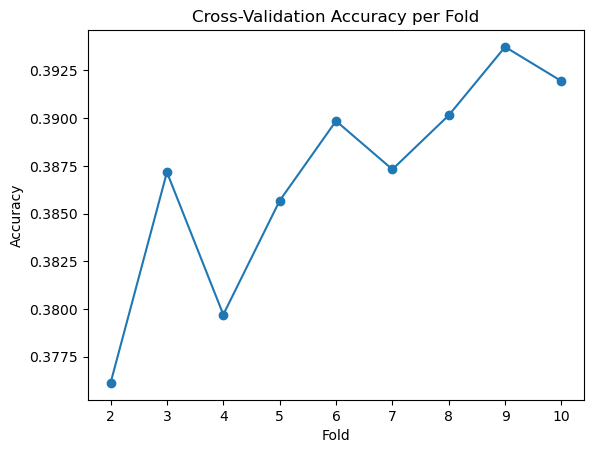

In [75]:
#plot curve where model accuracy is low, hovering between .39 and .37
mean_scores = {}

for k in all_results.keys():
    scores = all_results[k]
    mean_score = sum(scores) / len(scores)
    mean_scores[k] = mean_score

 #turn dictionary into two lists for plotting
k_values = list(mean_scores.keys())
acc_values = list(mean_scores.values())

plt.plot(k_values, acc_values, marker="o") 
plt.title("Cross-Validation Accuracy per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.show()

In [76]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [None, 12],
    "min_samples_split": [2, 10],
    "min_samples_leaf": [1, 2],
    "max_features": ["sqrt", "log2"]
}

best_score = -np.inf
best_params = None

for ne, md, mss, msl, mf in itertools.product(
        param_grid["n_estimators"],
        param_grid["max_depth"],
        param_grid["min_samples_split"],
        param_grid["min_samples_leaf"],
        param_grid["max_features"]):
    
    rf = RandomForestClassifier(
        random_state=0, n_jobs=1, class_weight="balanced",
        n_estimators=ne, max_depth=md,
        min_samples_split=mss, min_samples_leaf=msl,
        max_features=mf
    )
    cv_res = cross_validate(rf, X_train, y_train, cv=cv, scoring="f1_macro", n_jobs=1)
    mean_f1 = np.mean(cv_res["test_score"])
    if mean_f1 > best_score:
        best_score = mean_f1
        best_params = {"n_estimators": ne, "max_depth": md,
                       "min_samples_split": mss, "min_samples_leaf": msl,
                       "max_features": mf}

print("Best params (manual):", best_params)
print("Best CV (macro-F1):", round(best_score, 4))

best_rf = RandomForestClassifier(random_state=0, n_jobs=1, class_weight="balanced", **best_params)
best_rf.fit(X_train, y_train)

Best params (manual): {'n_estimators': 400, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt'}
Best CV (macro-F1): 0.3287


RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       n_estimators=400, n_jobs=1, random_state=0)

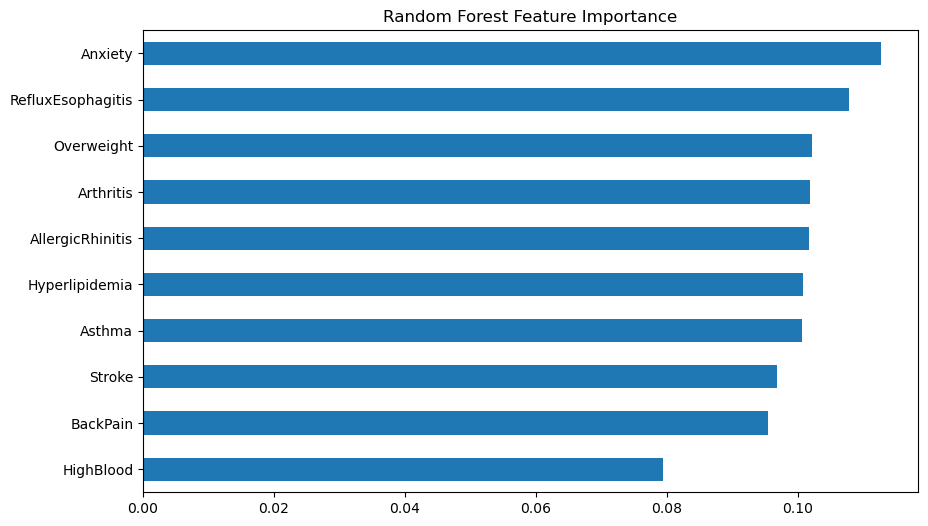

In [77]:
# feature importance
importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
importances.sort_values().plot(kind="barh", figsize=(10,6))
plt.title("Random Forest Feature Importance")
plt.show()


In [78]:
#Predict for the test set and the plot for the conusion matrix
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)
# binarize labels for multiclass ROC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# compute macro AUC-ROC
roc_auc = roc_auc_score(y_test_bin, y_pred_proba, average="macro", multi_class="ovr")

print("AUC-ROC:", round(roc_auc, 4))
print("Test accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Classification report:\n", classification_report(y_test, y_pred, digits=3))

AUC-ROC: 0.5022
Test accuracy: 0.3464
Classification report:
               precision    recall  f1-score   support

           0      0.330     0.347     0.338      1108
           1      0.216     0.297     0.250       701
           2      0.469     0.370     0.414      1491

    accuracy                          0.346      3300
   macro avg      0.339     0.338     0.334      3300
weighted avg      0.369     0.346     0.353      3300



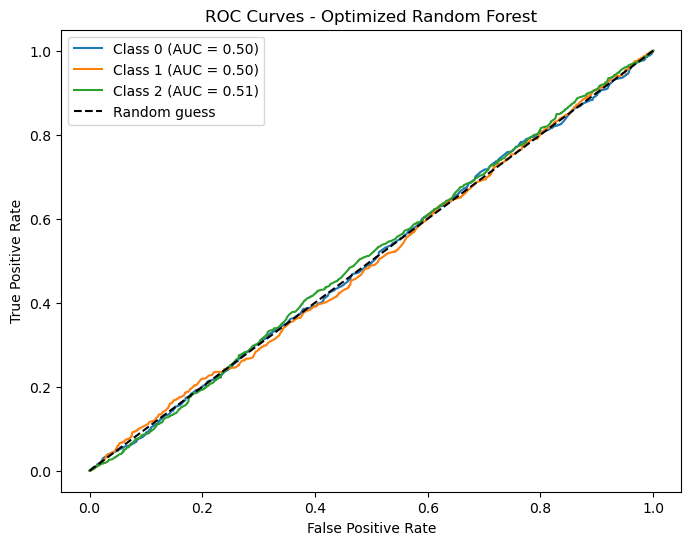

In [79]:
# Binarize labels for multiclass ROC
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# ROC for each class
fpr0, tpr0, _ = roc_curve(y_test_bin[:, 0], y_pred_proba[:, 0])
roc_auc0 = auc(fpr0, tpr0)

fpr1, tpr1, _ = roc_curve(y_test_bin[:, 1], y_pred_proba[:, 1])
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test_bin[:, 2], y_pred_proba[:, 2])
roc_auc2 = auc(fpr2, tpr2)

# Plot curves
plt.figure(figsize=(8,6))
plt.plot(fpr0, tpr0, label=f"Class 0 (AUC = {roc_auc0:.2f})")
plt.plot(fpr1, tpr1, label=f"Class 1 (AUC = {roc_auc1:.2f})")
plt.plot(fpr2, tpr2, label=f"Class 2 (AUC = {roc_auc2:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random guess")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Optimized Random Forest")
plt.legend()
plt.show()

Best Predictions: [0 0 2 ... 2 1 0]
Best Probabilties:
 [[0.40022276 0.24836709 0.35141015]
 [0.35351556 0.31036588 0.33611856]
 [0.09115548 0.38519562 0.5236489 ]
 ...
 [0.31638901 0.33756475 0.34604624]
 [0.33629349 0.38552902 0.27817749]
 [0.3840549  0.32817243 0.28777266]]


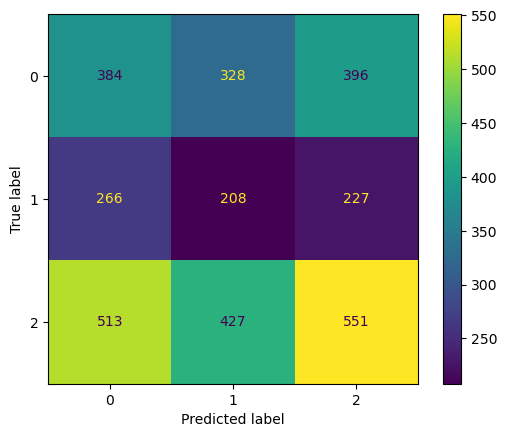

In [80]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

print(f"Best Predictions: {y_pred}")
print(f"Best Probabilties:\n {y_pred_proba}")

In [81]:
# determining the importance of features
importances = best_rf.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feat_importance)

Anxiety              0.112788
RefluxEsophagitis    0.107809
Overweight           0.102203
Arthritis            0.101964
AllergicRhinitis     0.101733
Hyperlipidemia       0.100891
Asthma               0.100676
Stroke               0.096927
BackPain             0.095493
HighBlood            0.079515
dtype: float64
